In [2]:
import glob
import logging
from multiprocessing import Pool
import os
import sys

from astropy.io import fits
import numpy as np
import tempfile
import threading
from threading import Thread
from photutils import DAOStarFinder


from pyql.database.ql_database_interface import session
from pyql.database.ql_database_interface import Master
from pyql.database.ql_database_interface import IR_flt_0

In [1]:
#test data:
import numpy as np
from astropy.io import fits 
file='/grp/hst/wfc3a/GO_Links/12167/Visit05/ibhg05zhq_flt.fits'
hdulist=fits.open(file)
data=hdulist[1].data
hdulist.close()

In [2]:
import scipy
from scipy.stats import sigmaclip
from scipy.ndimage import gaussian_filter

clip,low,high=sigmaclip(data)
s=clip.std()

k = np.array([[1,1,1],[1,1,1],[1,1,1]])
from scipy import ndimage
data_con=ndimage.convolve(data, k, mode='constant', cval=0.0)

[[  0   0   0 ...,   3   3   3]
 [  0   0   0 ...,   3   3   3]
 [  0   0   0 ...,   3   3   3]
 ..., 
 [789 789 789 ..., 804 804 804]
 [789 789 789 ..., 804 804 804]
 [789 789 789 ..., 804 804 804]]
[[   0    0    0 ...,    2    2    2]
 [   0    0    0 ...,    2    2    2]
 [   0    0    0 ...,    2    2    2]
 ..., 
 [1183 1183 1183 ..., 1218 1218 1218]
 [1183 1183 1183 ..., 1218 1218 1218]
 [1183 1183 1183 ..., 1218 1218 1218]]


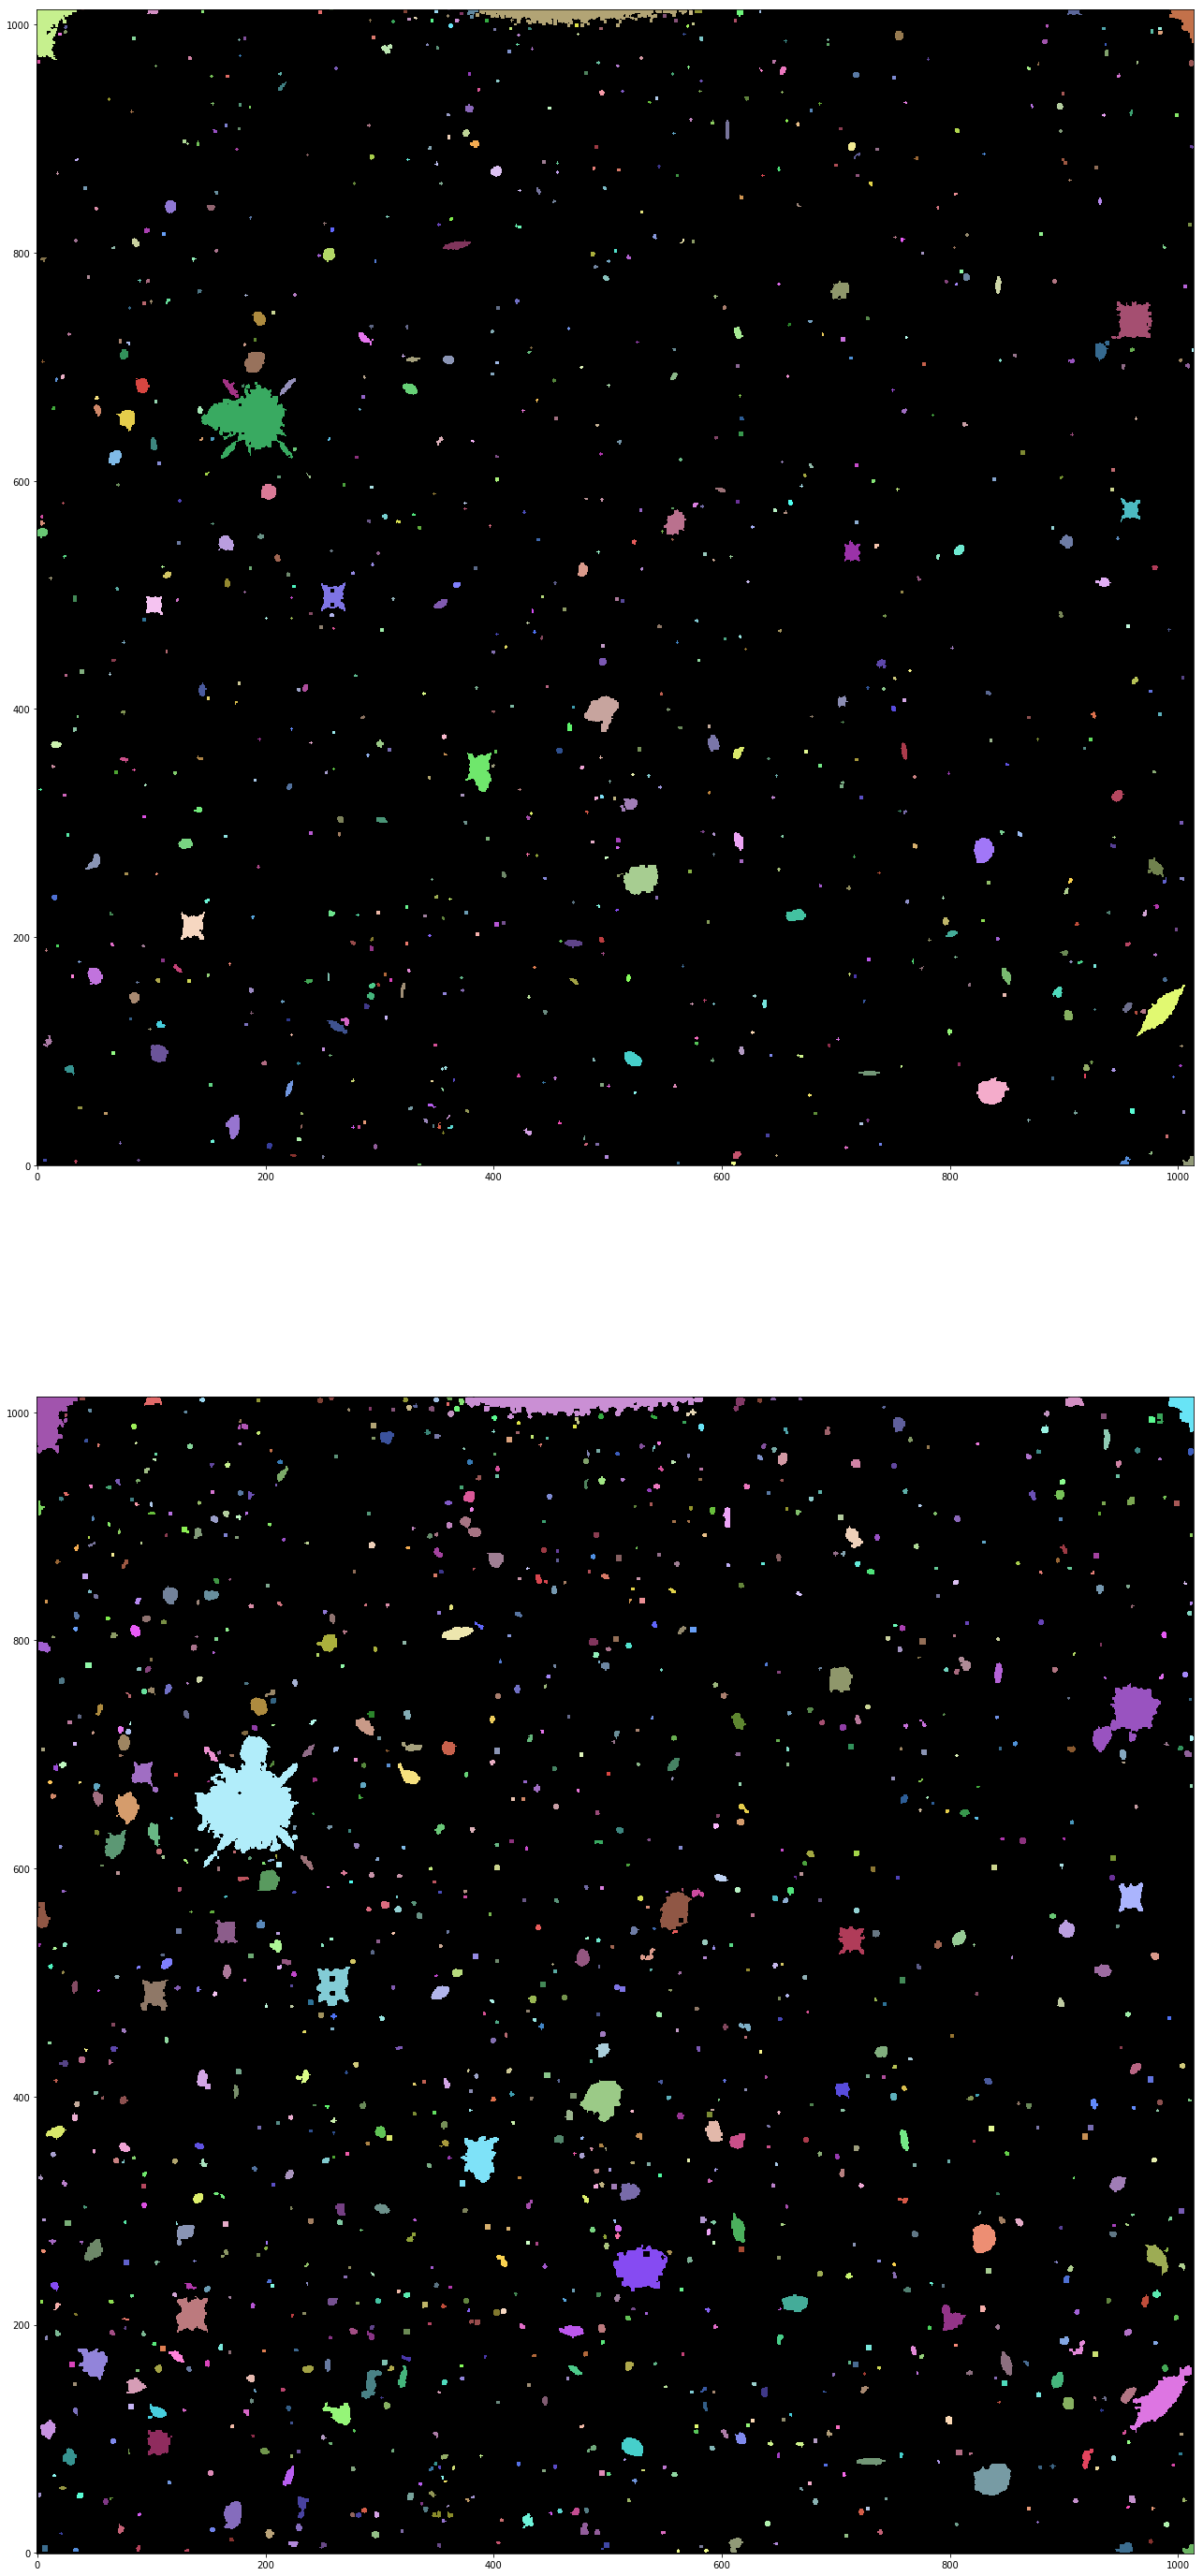

In [4]:
%matplotlib inline
import numpy as np
from astropy.io import fits
#data=np.array([[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,26.,1.,1.,1.,1.,1.,1.,1.,20.,1.],[1.,1.,1.,1.,20.,30.,15.,1.,1.,1.,1.,1.,15.,56.,10.],[1.,1.,1.,1.,1.,20.,1.,1.,1.,1.,1.,1.,8.,20.,5.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]])
#hdulist=fits.open(locales[3])
#data=hdulist[1].data
#hdulist.close()
from photutils import detect_threshold
threshold = detect_threshold(data, snr=3.)
threshold_con = detect_threshold(data_con, snr=3.)
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import detect_sources
sigma = 2.0 * gaussian_fwhm_to_sigma    # FWHM = 2.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
segm = detect_sources(data, threshold, npixels=5, filter_kernel=kernel)
segm_con = detect_sources(data_con, threshold_con, npixels=5, filter_kernel=kernel)

import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(50, 50))
ax1.imshow(segm, origin='lower',cmap=segm.cmap(random_state=12345))# cmap='Greys_r', norm=norm)
ax2.imshow(segm_con, origin='lower', cmap=segm.cmap(random_state=12345))
print(segm.array)
print(segm_con.array)